<a href="https://colab.research.google.com/github/revak18/nicotine_use_mathmodel/blob/main/Models_Infection_Recovery_Rates.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Models for Time-Varying Parameters**
*   Beta: Rate of infection
*   Gamma: Rate of recovery
*   Rho: Rate of relapse


---



ΔP is calculated as the year-to-year difference in the percentage of the population using e-cigarettes. This difference is converted from a percentage to a proportion by dividing by 100.
The initial year's Δ𝑃 is set to 0 since there is no preceding data to compare.

The susceptible population each year is estimated as one minus the proportion of the population that was using e-cigarettes the previous year. For the initial year, it is assumed that the susceptible population equals the complement of the initial usage percentage. This reflects the portion of the population that is 'at risk' of beginning to use e-cigarettes.

The infection rate 𝛽 is estimated using the formula:

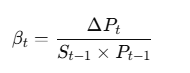

where Δ𝑃𝑡 is the change in proportion using e-cigarettes from the previous year, 𝑆𝑡−1 is the susceptible population proportion at the end of the previous year, and 𝑃𝑡−1 is the total population in millions from the previous year. This formula estimates the rate at which non-users start using e-cigarettes, akin to the rate at which susceptible individuals become 'infected' with a virus.

# **Beta: Rate of infection for e-cigarettes in 'Young Adults' and 'Adults'**


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

data = {
    'Year': [2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023],
    'Percentage_Using': [3.7, 3.2, 3.2, 2.8, 3.2, 4.5, 3.7, 4.5, 6.0, 6.6],
    'Total_Population_Millions': [244793112, 247085274, 249372462, 251489792, 253452698, 255241278, 257269724, 258418544, 260046087, 262083034]
}
df = pd.DataFrame(data)
# Calculating Delta P and Susceptible Population
df['Delta_P'] = df['Percentage_Using'].diff().fillna(0) / 100  # Converting percentage to proportion
df['Susceptible_Population'] = 1 - df['Percentage_Using'].shift(1).fillna(df['Percentage_Using'][0]) / 100

# Calculating beta
df['Beta'] = df['Delta_P'] / (df['Susceptible_Population'] * df['Total_Population_Millions'].shift(1).fillna(df['Total_Population_Millions'][0]))

Fitted parameters (a, b, c): [-2.56514608e-11  1.72714425e+00 -3.02177481e+00]


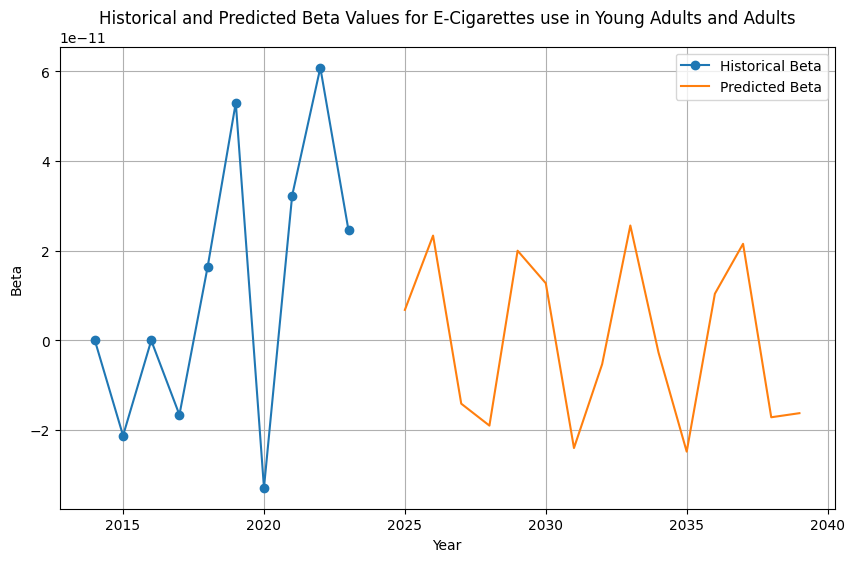

In [2]:
import pandas as pd
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

# Define a function to model the beta values (you can experiment with different functions)
def model_beta(t, a, b, c):
    """
    Model beta values using a sinusoidal function.

    Args:
        t: Time (years since 2011)
        a: Amplitude
        b: Frequency
        c: Phase shift

    Returns:
        Predicted beta value
    """
    return a * np.sin(b * t + c)

# Prepare data for curve fitting
t = df['Year'] - df['Year'].min()  # Time in years since 2011
y = df['Beta']

# Perform curve fitting
popt, pcov = curve_fit(model_beta, t, y)
a, b, c = popt

# Predict future beta values
future_years = np.arange(2025, 2040)
future_t = future_years - df['Year'].min()
predicted_beta = model_beta(future_t, a, b, c)

# Create a DataFrame for the results
results_df = pd.DataFrame({'Year': future_years, 'Predicted_Beta': predicted_beta})

# Print the results
print("Fitted parameters (a, b, c):", popt)
#print("Predicted Beta Values:\n", results_df)

# Plotting (Optional)
plt.figure(figsize=(10, 6))
plt.plot(df['Year'], df['Beta'], label='Historical Beta', marker='o')
plt.plot(future_years, predicted_beta, label='Predicted Beta')
plt.xlabel('Year')
plt.ylabel('Beta')
plt.title('Historical and Predicted Beta Values for E-Cigarettes use in Young Adults and Adults')
plt.legend()
plt.grid(True)
plt.show()

# **Beta: Rate of infection for e-cigarettes in 'Youth'**



In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Data Setup
#https://www.lung.org/research/trends-in-lung-disease/tobacco-trends-brief/overall-smoking-trends#:~:text=Trends%20in%20Cigarette%20Smoking%20Rates%20*%20Long,17%%20among%20adults%2C%20from%2014.0%%20in%202017.
#https://www.childstats.gov/americaschildren/tables/pop1.asp
data = {
    'Year': [2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024],
    'Percentage_Using': [2.1, 3.8, 5.6, 17.3, 21.3, 15.6, 15.0, 25.6, 38.0, 24.7, 11.3, 17.4, 14.6, 11.3],
    'Total_Population_Millions': [25.1, 25.1, 25, 25, 25, 25, 25.1, 25, 25, 26.2, 26.2, 26.1, 26.0, 25.4]
}
df = pd.DataFrame(data)
# Calculating Delta P and Susceptible Population
df['Delta_P'] = df['Percentage_Using'].diff().fillna(0) / 100  # Converting percentage to proportion
df['Susceptible_Population'] = 1 - df['Percentage_Using'].shift(1).fillna(df['Percentage_Using'][0]) / 100

# Calculating beta
df['Beta'] = df['Delta_P'] / (df['Susceptible_Population'] * df['Total_Population_Millions'].shift(1).fillna(df['Total_Population_Millions'][0]))


Fitted parameters (a, b, c): [ 0.00427761  1.49395532 -3.09497364]
Predicted Beta Values:
     Year  Predicted_Beta
0   2025       -0.003665
1   2026        0.001917
2   2027        0.003960
3   2028       -0.001309
4   2029       -0.004161
5   2030        0.000671
6   2031        0.004264
7   2032       -0.000016
8   2033       -0.004266
9   2034       -0.000639
10  2035        0.004168
11  2036        0.001279
12  2037       -0.003972
13  2038       -0.001889
14  2039        0.003682


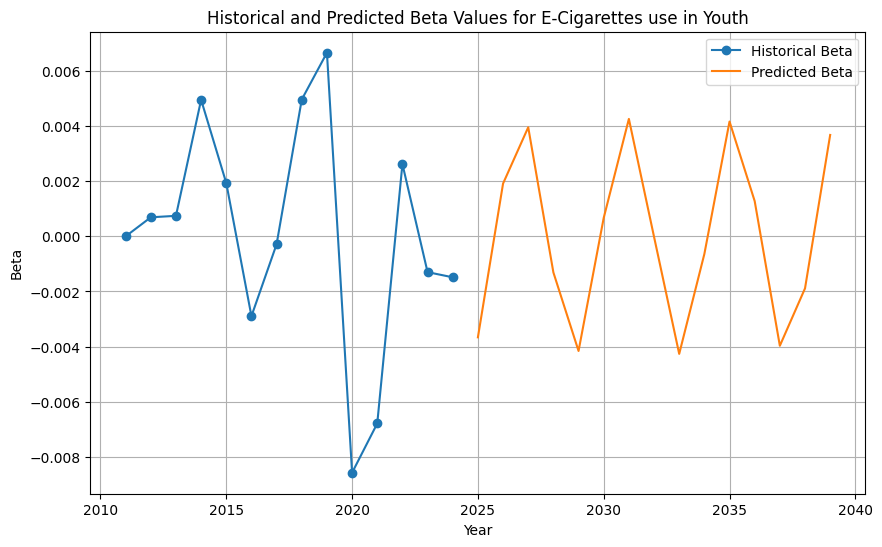

In [4]:
import pandas as pd
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

# Define a function to model the beta values (you can experiment with different functions)
def model_beta(t, a, b, c):
    """
    Model beta values using a sinusoidal function.

    Args:
        t: Time (years since 2011)
        a: Amplitude
        b: Frequency
        c: Phase shift

    Returns:
        Predicted beta value
    """
    return a * np.sin(b * t + c)

# Prepare data for curve fitting
t = df['Year'] - df['Year'].min()  # Time in years since 2011
y = df['Beta']

# Perform curve fitting
popt, pcov = curve_fit(model_beta, t, y)
a, b, c = popt

# Predict future beta values
future_years = np.arange(2025, 2040)
future_t = future_years - df['Year'].min()
predicted_beta = model_beta(future_t, a, b, c)

# Create a DataFrame for the results
results_df = pd.DataFrame({'Year': future_years, 'Predicted_Beta': predicted_beta})

# Print the results
print("Fitted parameters (a, b, c):", popt)
print("Predicted Beta Values:\n", results_df)

# Plotting (Optional)
plt.figure(figsize=(10, 6))
plt.plot(df['Year'], df['Beta'], label='Historical Beta', marker='o')
plt.plot(future_years, predicted_beta, label='Predicted Beta')
plt.xlabel('Year')
plt.ylabel('Beta')
plt.title('Historical and Predicted Beta Values for E-Cigarettes use in Youth')
plt.legend()
plt.grid(True)
plt.show()

In [12]:
import numpy as np
import random

# beta: Infection coefficient
# "If one of your best friends offered you a cigarette, would you smoke it?"
#  For e-cigarettes, 18% responded "yes" - 2016 U.S. Surgeon General report
#  For cigarettes, 0.3% responded "yes" - 2014 National Survey on Drug Use and Health
#  Calculates beta using "18%" & flg="EC"(e-cigarettes) OR 3% & flg="C"(cigarettes) as seed and seasonal variation.

def beta(t,flg):
  if flg == 'EC':
     beta = 0.18 + (random.random()/100) * np.cos(t / 12 * np.pi)
  else:
     beta = 0.003 + (random.random()/1000) * np.cos(t / 12 * np.pi)
  return beta

# Calculate beta for 10 years (120 months)
years = 1
months = years * 12
time_points = np.arange(months)  # Create an array of time points (months)

# Calculate beta values for each month
beta_values = [beta(t,'EC') for t in time_points]

# Print the beta values (you can adjust the formatting as desired)
for i, beta in enumerate(beta_values):
  print(f"Month {i+1}: Beta = {beta:.6f}")

Month 1: Beta = 0.183764
Month 2: Beta = 0.187943
Month 3: Beta = 0.185020
Month 4: Beta = 0.180765
Month 5: Beta = 0.184156
Month 6: Beta = 0.181565
Month 7: Beta = 0.180000
Month 8: Beta = 0.178073
Month 9: Beta = 0.176609
Month 10: Beta = 0.177246
Month 11: Beta = 0.175197
Month 12: Beta = 0.173818


In [16]:
import numpy as np
import random

#gamma: Recovery coefficients
#Smoking Cessation: Fast Facts
#https://www.cdc.gov/tobacco/php/data-statistics/smoking-cessation/index.html
#In 2022, 67.7% of adults who smoked said they wanted to quit smoking.

#Quitting e-cigarettes: Quit attempts and quit intentions among youth and young adults
#https://pmc.ncbi.nlm.nih.gov/articles/PMC7808959/#:~:text=3.2.-,Cessation%20outcomes,reported%20general%20intentions%20to%20quit.
# Among current e-cigarette users, 33.3% reported a past-year quit attempt

# Calculates gamma using "33.30%" & flg="EC"(e-cigarettes) OR 67.70% & flg="C"(cigarettes) as seed and seasonal variation.
def gamma(t,flg):
  if flg == 'EC':
     gamma = (1.333 **(1/12) - 1) + (random.random()/100) * np.cos(t / 12 * np.pi) #e-cigarettes
  else:
     gamma = (1.677 **(1/12) - 1) + (random.random()/100) * np.cos(t / 12 * np.pi) #cigarettes
  return gamma

# Calculate gamma for 1 year (12 months)
years = 1
months = years * 12
time_points = np.arange(months)  # Create an array of time points (months)

# Calculate gamma values for each month
gamma_values = [gamma(t,'EC') for t in time_points]

# Print the gamma values (you can adjust the formatting as desired)
for i, gamma in enumerate(gamma_values):
  print(f"Month {i+1}: Gamma = {gamma:.6f}")

Month 1: Gamma = 0.033375
Month 2: Gamma = 0.026603
Month 3: Gamma = 0.028077
Month 4: Gamma = 0.027408
Month 5: Gamma = 0.026561
Month 6: Gamma = 0.024962
Month 7: Gamma = 0.024242
Month 8: Gamma = 0.022363
Month 9: Gamma = 0.023486
Month 10: Gamma = 0.021932
Month 11: Gamma = 0.023661
Month 12: Gamma = 0.019075


In [18]:
import numpy as np
import random

#rho: Relapse coefficients
#Smoking Cessation: Fast Facts
#https://www.cdc.gov/tobacco/php/data-statistics/smoking-cessation/index.html
#In 2022, 8.8% of adults who smoked were able to successfully quit smoking in the past year.
# That means 100 - 8.8 = 91.2% relapsed.

#Effectiveness of e-cigarettes as aids for smoking cessation: evidence from the PATH Study cohort, 2017–2019
#https://tobaccocontrol.bmj.com/content/32/e2/e145
#Furthermore, switching to e-cigarettes did not reduce the risk of relapse to cigarette smoking compared with other recent former smokers.
#Instead, nearly 60% of recent former smokers who were daily e-cigarette users had relapsed to cigarette smoking by 2019 (W5).

# Calculates rho using "60.00%" & flg="EC"(e-cigarettes) OR 91.20% & flg="C"(cigarettes) as seed and seasonal variation.
def rho(t,flg):
  if flg == 'EC':
     rho = (1.600 **(1/12) - 1) + (random.random()/100) * np.cos(t / 12 * np.pi) #e-cigarettes
  else:
     rho = (1.912 **(1/12) - 1) + (random.random()/100) * np.cos(t / 12 * np.pi) #cigarettes
  return rho

# Calculate rho for 1 year (12 months)
years = 1
months = years * 12
time_points = np.arange(months)  # Create an array of time points (months)

# Calculate rho values for each month
rho_values = [rho(t,'C') for t in time_points]

# Print the rho values (you can adjust the formatting as desired)
for i, rho in enumerate(rho_values):
  print(f"Month {i+1}: Rho = {rho:.6f}")

Month 1: Rho = 0.058691
Month 2: Rho = 0.064265
Month 3: Rho = 0.061835
Month 4: Rho = 0.059860
Month 5: Rho = 0.056189
Month 6: Rho = 0.056024
Month 7: Rho = 0.055498
Month 8: Rho = 0.054257
Month 9: Rho = 0.053556
Month 10: Rho = 0.048777
Month 11: Rho = 0.052399
Month 12: Rho = 0.046818
